<a href="https://colab.research.google.com/github/ScarrryMary/IT_MIPT_group25-26/blob/main/Seminar_10_25_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

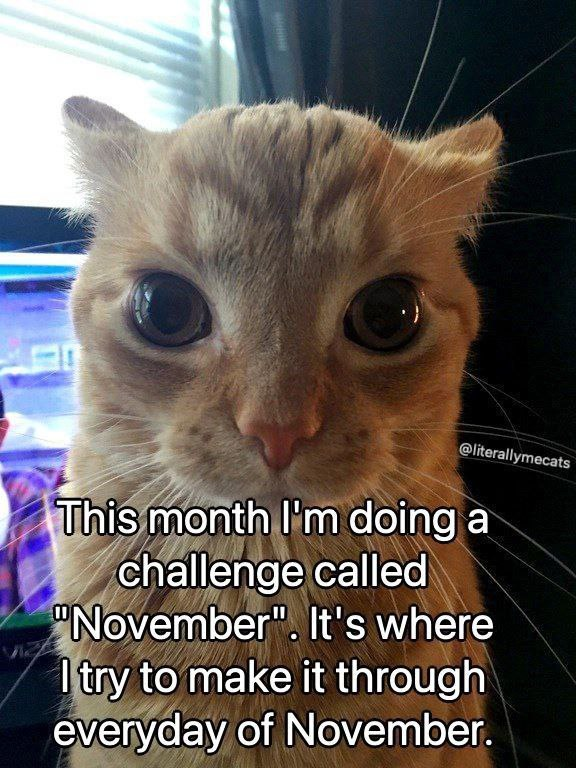

## Ужас на Хеллоуин - двусвязный список

In [3]:
class Box:
    def __init__(self, cat=None):
        self.cat = cat
        self.nextcat = None
        self.prevcat = None


class DoubleLinkedList:
    def __init__(self):
        self.head = None
        self.tail = None

    def contains(self, cat):
        cur = self.head
        while cur:
            if cur.cat == cat:
                return True
            cur = cur.nextcat
        return False

    def addToEnd(self, newcat):
        newbox = Box(newcat)
        # если список пуст
        if self.head is None:
            self.head = newbox
            self.tail = newbox
            return

        # если нет — добавляем в хвост
        newbox.prevcat = self.tail
        self.tail.nextcat = newbox
        self.tail = newbox

    def addToStart(self, newcat):
        newbox = Box(newcat)
        if self.head is None:
            self.head = newbox
            self.tail = newbox
            return
        newbox.nextcat = self.head
        self.head.prevcat = newbox
        self.head = newbox

    def get(self, index):
        cur = self.head
        i = 0
        while cur:
            if i == index:
                return cur.cat
            cur = cur.nextcat
            i += 1
        raise IndexError("Index out of bounds")

    def removeBox(self, rmcat):
        cur = self.head

        while cur:
            if cur.cat == rmcat:
                # удаляем голову
                if cur == self.head:
                    self.head = cur.nextcat
                    if self.head:
                        self.head.prevcat = None
                    else:
                        self.tail = None  # список стал пуст
                    return

                # удаляем хвост
                if cur == self.tail:
                    self.tail = cur.prevcat
                    self.tail.nextcat = None
                    return

                # удаляем в середине
                cur.prevcat.nextcat = cur.nextcat
                cur.nextcat.prevcat = cur.prevcat
                return

            cur = cur.nextcat

    def LLprint(self):
        print("DOUBLE LINKED LIST")
        print("-----")
        cur = self.head
        i = 0
        while cur:
            print(f"{i}: {cur.cat}")
            cur = cur.nextcat
            i += 1
        print("-----")

    def LLprintReverse(self):
        """Печатает список с хвоста."""
        print("REVERSED LIST")
        print("-----")
        cur = self.tail
        i = 0
        while cur:
            print(f"{i}: {cur.cat}")
            cur = cur.prevcat
            i += 1
        print("-----")


In [4]:
dll = DoubleLinkedList()

dll.addToEnd("кот")
dll.addToEnd("пёс")
dll.addToEnd("хомяк")

dll.LLprint()

DOUBLE LINKED LIST
-----
0: кот
1: пёс
2: хомяк
-----


In [5]:
print("Элемент с индексом 1:", dll.get(1))

dll.addToStart("попугай")
dll.LLprint()

dll.removeBox("пёс")
dll.LLprint()


Элемент с индексом 1: пёс
DOUBLE LINKED LIST
-----
0: попугай
1: кот
2: пёс
3: хомяк
-----
DOUBLE LINKED LIST
-----
0: попугай
1: кот
2: хомяк
-----


## Асимптотика алгоритмов (потребление ресурсов)

В асимптотическом анализе мы оцениваем производительность алгоритма с точки зрения размера входных данных (мы не измеряем фактическое время выполнения). Мы вычисляем порядок роста времени (или пространства), затраченного алгоритмом с точки зрения размера входных данных. Например, линейный поиск растет линейно, а двоичный поиск растет логарифмически с точки зрения размера входных данных.

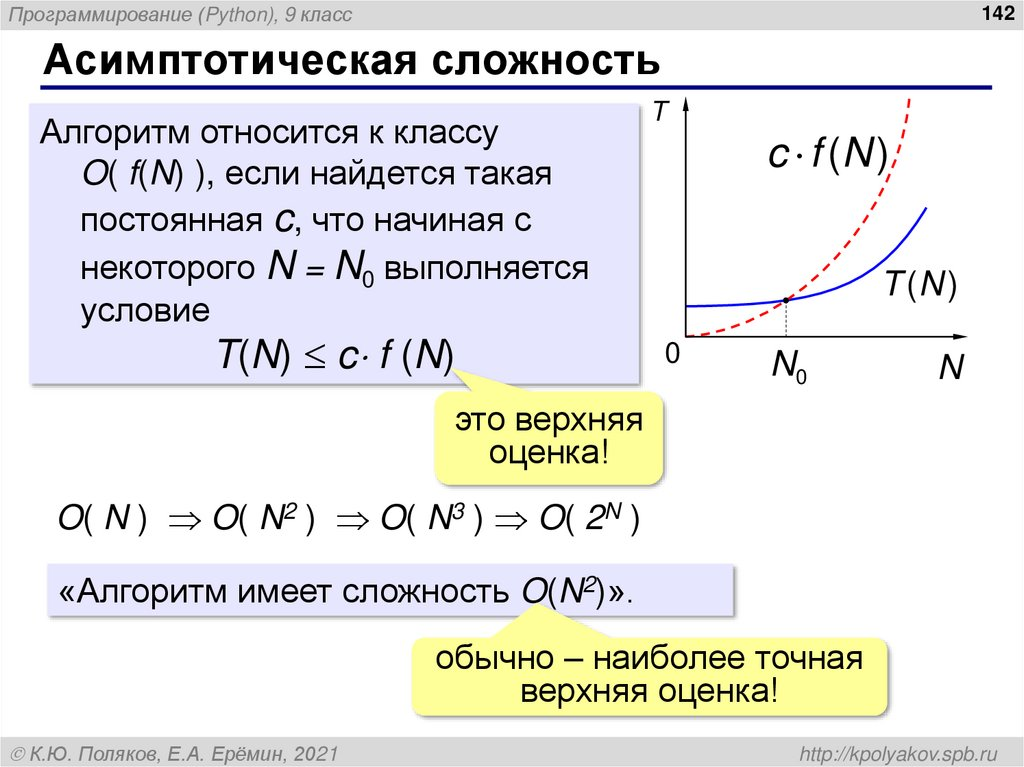

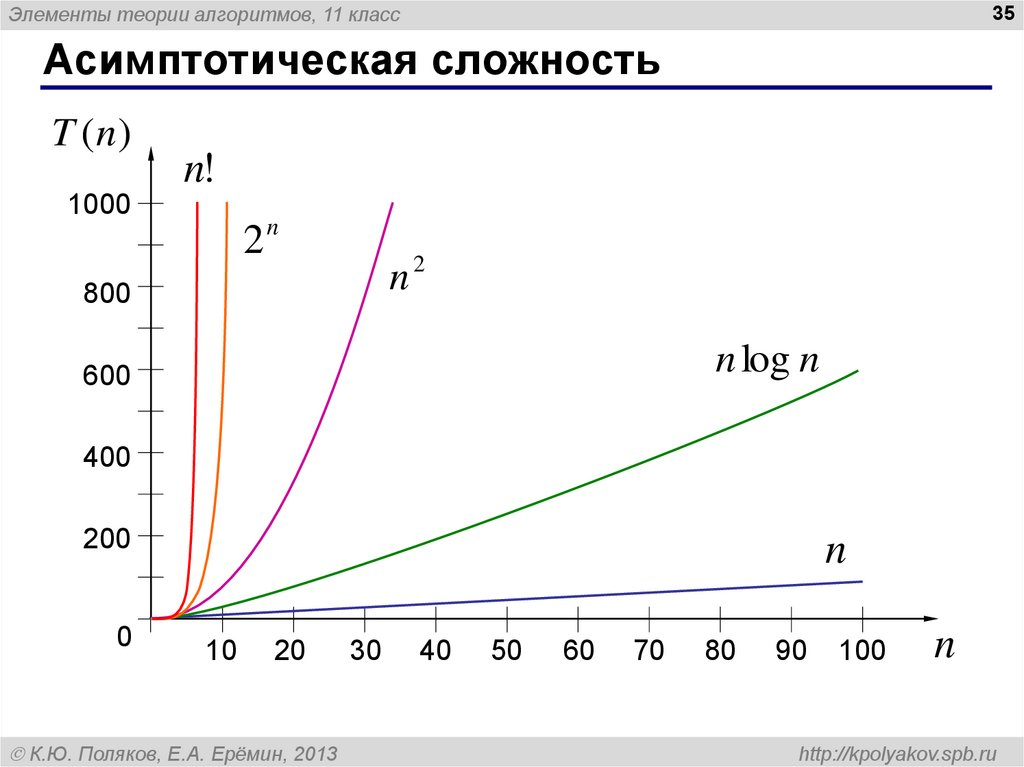

**Примеры с анализом их сложности**:
1. Алгоритм линейного поиска:

```python
# Linearly search target in arr.
# If target is present, return the index;
# otherwise, return -1
def search(arr, x):
    for i in range(len(arr)):
        if arr[i] == x:
            return i
    return -1

arr = [1, 10, 30, 15]
x = 30
print(search(arr, x))
```

* Лучший случай: Постоянное время, независимо от размера входных данных. Это будет иметь место, если элемент для поиска находится в первом индексе указанного списка. Таким образом, количество сравнений в этом случае равно 1.
* Средний случай: Линейное время. Это будет иметь место, если элемент для поиска находится в среднем индексе (при среднем поиске) указанного списка.
* Худший случай: Элемент для поиска отсутствует в списке.


2. **Специальная сумма массива**:   
в этом примере мы возьмем массив длины (n) и рассмотрим следующие случаи:

* Если (n) четное, то наш вывод будет равен 0.
* Если (n) нечетно, то наш вывод будет представлять собой сумму элементов массива.

Ниже представлена ​​реализация данной задачи:

```python
def getSum(arr1):
    n = len(arr1)
    if n % 2 == 0:  # (n) is even
        return 0

    sum = 0
    for i in range(n):
        sum += arr1[i]
    return sum  # (n) is odd

# Declaring two lists, one with an odd length
# and the other with an even length
arr1 = [1, 2, 3, 4]
arr2 = [1, 2, 3, 4, 5]
print(getSum(arr1))
print(getSum(arr2))
```



### Как анализировать циклы для анализа сложности алгоритмов

Вот общие шаги по анализу циклов для анализа сложности:

* Определить количество итераций цикла. Обычно это делается путем анализа переменных управления циклом и условия завершения цикла.

* Определите количество операций, выполняемых в каждой итерации цикла. Это может включать как арифметические операции, так и операции доступа к данным, такие как доступ к массиву или доступ к памяти.

* Выразите общее количество операций, выполненных циклом, как функцию размера входных данных. Это может включать использование математических выражений или нахождение выражения в замкнутой форме для количества операций, выполненных циклом.

* Определите порядок роста выражения для числа операций, выполняемых циклом.


### Постоянная временная сложность $O(1)$:
Временная сложность функции (или набора операторов) считается равной O(1), если она не содержит циклов, рекурсий и вызовов других функций с непостоянным временем выполнения. То есть набор нерекурсивных и нециклических операторов.

В информатике O(1) относится к постоянной временной сложности, что означает, что время выполнения алгоритма остается постоянным и не зависит от размера входных данных. Это означает, что время выполнения алгоритма O(1) всегда будет занимать одинаковое количество времени независимо от размера входных данных. Примером алгоритма O(1) является доступ к элементу массива с использованием индекса.

**Пример**:

* Функция swap() имеет временную сложность O(1).

* Цикл или рекурсия, которая выполняется постоянное число раз, также считается O(1). Например, следующий цикл — O(1).

```python
# Here c is a constant
for i in range(1, c+1):
	# some O(1) expressions

	# This code is contributed by Pushpesh Raj.
```

Анализ временной сложности:

* Лучший случай: порядок роста будет постоянным , поскольку в лучшем случае мы предполагаем, что (n) четное.
Средний случай: В этом случае мы предположим, что четные и нечетные события равновероятны, поэтому порядок роста будет линейным.

* Худший случай: порядок роста будет линейным , поскольку в этом случае мы предполагаем, что (n) всегда нечетное.



### Линейная временная сложность $O(n)$:  

Временная сложность цикла считается O(n), если переменные цикла увеличиваются/уменьшаются на постоянную величину.

Линейная временная сложность, обозначаемая как O(n), является мерой роста времени выполнения алгоритма пропорционально размеру входных данных. В алгоритме O(n) время выполнения увеличивается линейно с размером входных данных.  

**Например**, поиск элемента в несортированном массиве или итерация по массиву и выполнение постоянного объема работы для каждого элемента будет O(n) операций. Проще говоря, для входных данных размера n алгоритму требуется n шагов для завершения операции.

```python
# Here c is a positive integer constant
for i in range(1, n+1, c):
	# some O(1) expressions

for i in range(n, 0, -c):
	# some O(1) expressions

	# This code is contributed by Pushpesh Raj
```


### Квадратичная временная сложность $O(n^2)$:
Квадратичная временная сложность, обозначаемая как $O(n^2)$, относится к алгоритму, время выполнения которого увеличивается пропорционально квадрату размера ввода. Другими словами, для ввода размера n алгоритму требуется n * n шагов для завершения операции.  

**Примером** алгоритма $O(n^2)$ является вложенный цикл, который итерирует по всему вводу для каждого элемента, выполняя постоянный объем работы для каждой итерации. Это приводит к общему количеству итераций n * n, что делает время выполнения квадратичным по размеру ввода.

```python
for i in range(1, n+1, c):
	for j in range(1, n+1, c):
		# some O(1) expressions

for i in range(n, 0, -c):
	for j in range(i+1, n+1, c):
		# some O(1) expressions

		# This code is contributed by Pushpesh Raj
```

**Пример**: Сортировка выбором и сортировка вставкой имеют временную сложность $O(n^2)$.  



### Логарифмическая временная сложность $O(Log N)$:
Временная сложность цикла считается как $O(Logn)$, если переменные цикла делятся/умножаются на постоянную величину. А также для рекурсивных вызовов в рекурсивной функции временная сложность считается как $O(Logn)$.

```python
i = 1
while(i <= n):
	# some O(1) expressions
	i = i*c

i = n
while(i > 0):
	# some O(1) expressions
	i = i//c

# This code is contributed by Pushpesh Raj
```

```python
# Recursive function
def recurse(n):
	if(n <= 0):
		return
	else:
		# some O(1) expressions
	recurse(n/c)
# Here c is positive integer constant greater than 1
# This code is contributed by Pushpesh Raj
```

**Пример**: двоичный поиск имеет временную сложность $O(Logn)$

### Логарифмическая временная сложность $O(Log(LogN))$:
Временная сложность цикла считается равной $O(Log(Logn))$, если переменные цикла уменьшаются/увеличиваются экспоненциально на постоянную величину.

```python
# Here c is a constant greater than 1
i = 2
while(i <= n):
	# some O(1) expressions
	i = i**c

# Here fun is sqrt or cuberoot or any other constant root
i = n
while(i > 1):
	# some O(1) expressions
	i = fun(i)

# This code is contributed by Pushpesh Raj
```

**Как объединить временные сложности последовательных циклов?**

При наличии последовательных циклов мы рассчитываем временную сложность как сумму временных сложностей отдельных циклов.

Чтобы объединить временные сложности последовательных циклов, необходимо учесть количество итераций, выполняемых каждым циклом, и объем работы, выполняемой в каждой итерации. Общую временную сложность алгоритма можно рассчитать, умножив количество итераций каждого цикла на временную сложность каждой итерации и взяв максимум из всех возможных комбинаций.

Например, рассмотрим следующий код:

```python
for i in range(n):
  for j in range(m):
    # some constant time operation
```

Здесь внешний цикл выполняет n итераций, а внутренний цикл выполняет m итераций для каждой итерации внешнего цикла. Таким образом, общее количество итераций, выполняемых внутренним циклом, равно n * m, а общая временная сложность равна $O(n * m)$.

В другом примере рассмотрим следующий код:

```python
for i in range(n):
  for j in range(i):
    # some constant time operation
```

Здесь внешний цикл выполняет n итераций, а внутренний цикл выполняет i итераций для каждой итерации внешнего цикла, где i — текущий счетчик итераций внешнего цикла. Общее количество итераций, выполненных внутренним циклом, можно вычислить, суммируя количество итераций, выполненных в каждой итерации внешнего цикла, которое определяется формулой sum(i) от i=1 до n, что равно n * (n + 1) / 2.

Кусочек квиза!: https://www.geeksforgeeks.org/quizzes/quiz-on-complexity-analysis-for-dsa/?page=1

Хорошая статья: https://www.geeksforgeeks.org/dsa/asymptotic-analysis-of-algorithms-notes-for-gate-exam/?ysclid=mhnrh8zeyw624261303

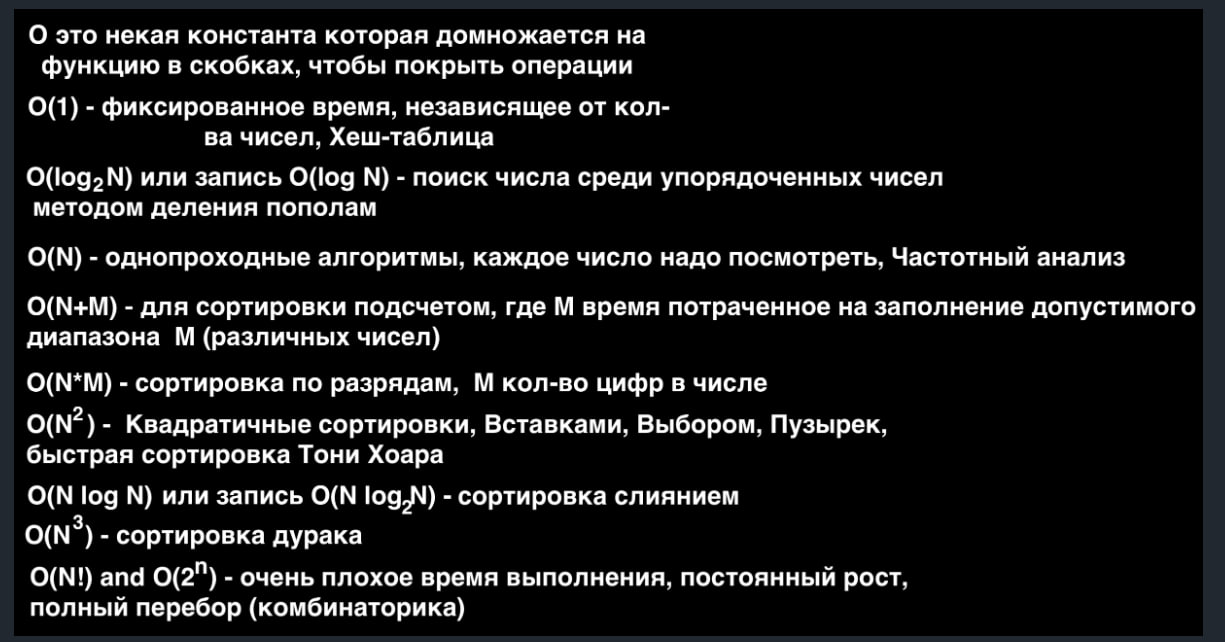

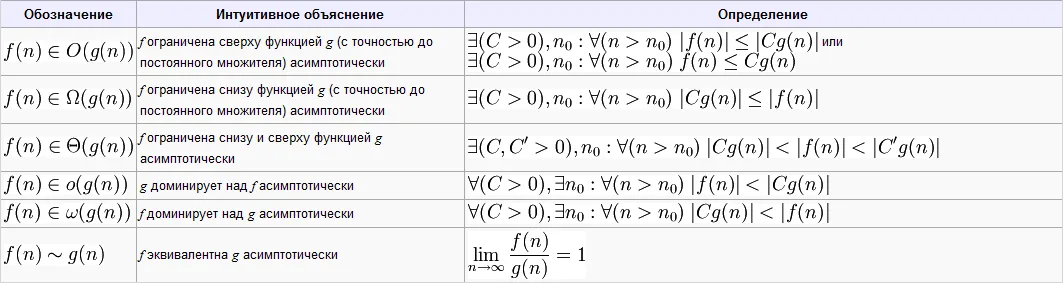

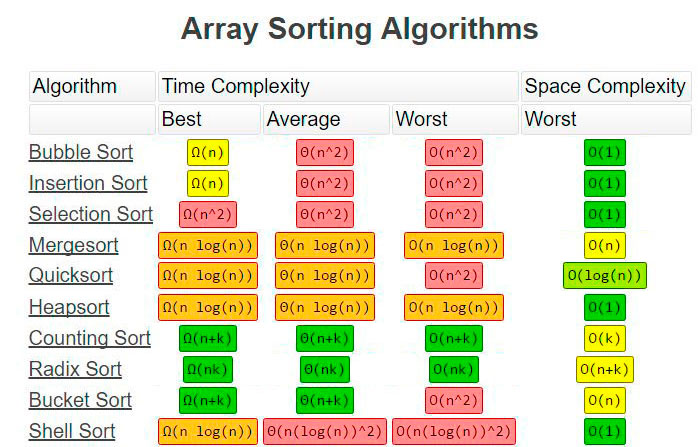

## Сортировки

### Случайная сортировка

In [ ]:
import random

def shuffle(a):
  n = len(a)
  for i in range(n):
    j = random.randint(0, n-1)
    a[i], a[j] = a[j], a[i]

def is_sorted(a):
  n = len(a)
  for i in range(n-1):
    if a[i] > a[i+1]:
      return False
  return True

def random_sort(a):
  while not is_sorted(a):
    shuffle(a)

a = [4, 2, 5, 0]
random_sort(a)
print(a)

[0, 2, 4, 5]


Как работает алгоритм:

1) Проверяем, отсортирован ли массив

2) Если нет - полностью перемешиваем его случайным образом

3) Повторяем до тех пор, пока не получим отсортированный массив

* Сложность: $O(n × n!)$ в среднем случае

* Худший случай: Бесконечное время (теоретически)

### Сортировка пузырьком

In [ ]:
def bubble_sort(a):
  n = len(a)
  for i in range(n):
    for j in range(n-i-1):
      if a[j] > a[j+1]:
        a[j], a[j+1] = a[j+1], a[j]

a = [15, -6, 3, 14, -23, 3, 12]
bubble_sort(a)
print(a)

[-23, -6, 3, 3, 12, 14, 15]


In [ ]:
def bubble_sort(a):
  n = len(a)
  i = 0
  swapped = True
  while swapped:
    swapped = False
    for j in range(n-i-1):
      if a[j] > a[j+1]:
        a[j], a[j+1] = a[j+1], a[j]
        swapped = True
    i += 1

a = [15, -6, 3, 14, -23, 3, 12]
bubble_sort(a)
print(a)

[-23, -6, 3, 3, 12, 14, 15]


1) Оптимизация: Алгоритм останавливается, когда за полный проход не было ни одного обмена (массив уже отсортирован)

2) Уменьшение области прохода: После каждого прохода самый большой элемент "всплывает" в конец, поэтому в следующем проходе можно не проверять последние $i$ элементов

* Лучший случай: $O(n)$ - когда массив уже отсортирован

* Средний и худший случай: $O(n^2)$

* Память: $O(1)$ (сортировка на месте)

* Устойчивость: Сохраняет порядок равных элементов

### Сортировка выбором

In [ ]:
def selection_sort(a):
  n = len(a)
  for i in range(n-1):
    k = i
    for j in range(i+1, n):
      if a[j] < a[k]:
        k = j
    a[k], a[i] = a[i], a[k]

a = [15, -6, 3, 14, -23, 3, 12]
selection_sort(a)
print(a)

[-23, -6, 3, 3, 12, 14, 15]


Как работает алгоритм:

1) Находим минимальный элемент в неотсортированной части массива

2) Меняем его с первым элементом неотсортированной части

3) Увеличиваем границу отсортированной части на 1 элемент

4) Повторяем до полной сортировки

* Сложность: $O(n^2)$ в лучшем, среднем и худшем случаях

* Память: $O(1)$ (сортировка на месте)

* Неустойчивость: Может менять порядок равных элементов

### Сортировка вставками

In [ ]:
def insertion_sort(a):
  n = len(a)
  for i in range(1, n):
    for j in range(i, 0, -1):
      if a[j] < a[j-1]:
        a[j], a[j-1] = a[j-1], a[j]

a = [15, -6, 3, 14, -23, 3, 12]
insertion_sort(a)
print(a)

[-23, -6, 3, 3, 12, 14, 15]


Как работает алгоритм:

1) Начинаем со второго элемента (i = 1)

2) Для каждого элемента "проталкиваем" его влево, пока он не займет правильную позицию в отсортированной части

3) Повторяем для всех элементов массива


* Лучший случай: $O(n)$ - когда массив уже отсортирован

* Средний и худший случай: $O(n^2)$

* Память: $O(1)$ (сортировка на месте)

* Устойчивость: Сохраняет порядок равных элементов

### Быстрая сортировка (сортировка Хоара)

- В массиве выбираем опорный элемент
- Каждый элемент сравниваем с опорным -> массив разделится на 2-3 части

In [13]:
from random import randint

def qsort(a, left, right):
    if left >= right:
        return a

    x = a[randint(left, right)]
    i, j = left, right
    while i <= j:
        while a[i] < x:
            i += 1
        while a[j] > x:
            j -= 1
        if i <= j:
            a[i], a[j] = a[j], a[i]
            i += 1
            j -= 1

    qsort(a, left, j)
    qsort(a, i, right)
    return a

a = [15, -6, 3, 14, -23, 3, 12]
qsort(a, 0, len(a)-1)
print(a)

[-23, -6, 3, 3, 12, 14, 15]


```python
Рекурсия 1: [15, -6, 3, 14, -23, 3, 12] → [-23, -6, 3, 3, 14, 15, 12]
Рекурсия 2: [-23, -6, 3] → [-23, -6, 3] (уже отсортирован)
Рекурсия 3: [14, 15, 12] → [12, 14, 15]
Результат: [-23, -6, 3, 3, 12, 14, 15]
```

- Средний случай: $O(n log n)$

- Худший случай: $O(n^2)$ - маловероятен из-за случайного pivot

In [14]:
from random import randint

def qsort(a):
    if len(a) < 2:
        return a

    m = a[randint(0, len(a) - 1)]

    x, y, z = [], [], []
    for e in a:
        if e < m:
            x.append(e)
        elif e == m:
            y.append(e)
        else:
            z.append(e)

    return qsort(x) + y + qsort(z)


a = [15, -6, 3, 14, -23, 3, 12]
result = qsort(a)
print(result)  # [-23, -6, 3, 3, 12, 14, 15]

[-23, -6, 3, 3, 12, 14, 15]


- Требует $O(n)$ дополнительной памяти

### Сортировка слиянием

In [15]:
def merge(a, b):
    i = j = 0
    n = len(a)
    m = len(b)
    c = []
    while i < n and j < m:
        if a[i] <= b[j]:
            c.append(a[i])
            i += 1
        else:
            c.append(b[j])
            j += 1
    while i < n:
        c.append(a[i])
        i += 1
    while j < m:
        c.append(b[j])
        j += 1
    return c

def merge_sort(a):
    n = len(a)
    if n == 1:
        return a

    left = []
    for i in range(n//2):
        left.append(a[i])

    right = []
    for j in range(n//2, n):
        right.append(a[j])

    left = merge_sort(left)
    right = merge_sort(right)
    return merge(left, right)

- Сложность: $O(n*log n)$ в любом случае

- Память: $O(n)$ - требует дополнительного массива

In [16]:
def merge(a, b):
    i = j = 0
    result = []
    while i < len(a) and j < len(b):
        if a[i] <= b[j]:
            result.append(a[i])
            i += 1
        else:
            result.append(b[j])
            j += 1
    # Добавляем остатки используя extend
    result.extend(a[i:])
    result.extend(b[j:])
    return result

def merge_sort(a):
    if len(a) <= 1:
        return a

    mid = len(a) // 2
    left = merge_sort(a[:mid])    # используем срезы
    right = merge_sort(a[mid:])

    return merge(left, right)

1. Разбиваем на тривиальные случаи (массивы из 1 элемента)

2. Сортируем мелкие части (они уже отсортированы по определению)

3. Объединяем отсортированные части в большие отсортированные массивы

```python
Исходный: [15, -6, 3, 14, -23, 3, 12]

Уровень 1: [15, -6, 3] и [14, -23, 3, 12]
Уровень 2: [15], [-6, 3] и [14, -23], [3, 12]  
Уровень 3: [15], [-6], [3], [14], [-23], [3], [12]

Слияние:
[-6] + [3] → [-6, 3]
[14] + [-23] → [-23, 14]
[3] + [12] → [3, 12]

[15] + [-6, 3] → [-6, 3, 15]
[-23, 14] + [3, 12] → [-23, 3, 12, 14]

[-6, 3, 15] + [-23, 3, 12, 14] → [-23, -6, 3, 3, 12, 14, 15]
```

https://habr.com/ru/companies/kts/articles/727528/

### Сортировка подсчетом

In [ ]:
def sort_count(a):
  b = [0] * m
  for e in a:
    b[e] += 1

  a = []
  for i,e in enumerate(b):
    print(i, e)
    a += [i]*e

  return a

m = 10000
a = [1110, 59, 45, 0, 15, 98, 16, 1356, 1258, 985, 1110]
print(sort_count(a))


1. Подсчет: b[e] += 1 — подсчитываем, сколько раз встречается каждое число

2. Восстановление: [i]*count — создаем отсортированный массив, повторяя каждое число столько раз, сколько оно встретилось

### Поразрядная сортировка (least significant digit radix sort)

In [7]:
def digit(e, i):
  return int(e[i])

def lsd_sort(a):
  m = len(a[0]) #количество разрядов
  for i in range(m-1, -1, -1):
    c = [[] for _ in range(10)]
    for e in a:
      d = digit(e, i)
      c[d].append(e)

    a = []
    for j in range(10):
      a += c[j]
  return a


a = [1110, 59, 45, 0, 15, 98, 16, 1356, 1258, 985, 1110]
a = list(map(lambda x: '{:04}'.format(x), a))
print(a)
a = lsd_sort(a)
print(a)
print(list(map(int, a)))

['1110', '0059', '0045', '0000', '0015', '0098', '0016', '1356', '1258', '0985', '1110']
['0000', '0015', '0016', '0045', '0059', '0098', '0985', '1110', '1110', '1258', '1356']
[0, 15, 16, 45, 59, 98, 985, 1110, 1110, 1258, 1356]


```python
Исходный: ['1110', '0059', '0045', '0000', '0015', '0098', '0016', '1356', '1258', '0985', '1110']

Корзины:
0: ['1110', '0000', '1110']
5: ['0045', '0015']
6: ['1356', '0016']  
8: ['1258']
9: ['0059', '0098', '0985']

Результат: ['1110', '0000', '1110', '0045', '0015', '1356', '0016', '1258', '0059', '0098', '0985']
```

https://neerc.ifmo.ru/wiki/index.php?title=%D0%A6%D0%B8%D1%84%D1%80%D0%BE%D0%B2%D0%B0%D1%8F_%D1%81%D0%BE%D1%80%D1%82%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B0

* Время: $O(m × n)$, где $m$ — количество разрядов, $n$ — количество элементов

* Память: $O(n)$ — для корзин

## Куча. Сортировка кучей

Двоичная куча или пирамида (англ. Binary heap) — такое двоичное подвешенное дерево, для которого выполнены следующие три условия:
Значение в любой вершине не больше (если куча для минимума), чем значения её потомков.
На $i$-ом слое $2^i$ вершин, кроме последнего. Слои нумеруются с нуля.
Последний слой заполнен слева направо (как показано на рисунке)


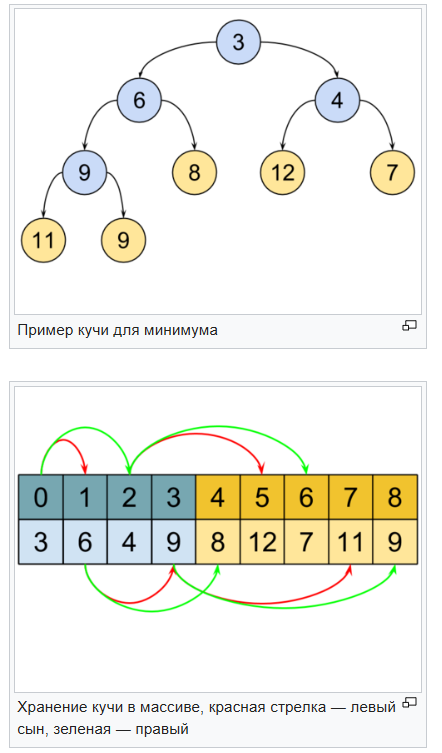

```python
Индексы:    [0,   1,   2,   3,   4,   5]
Значения:   [10,  8,   7,   5,   3,   2]

        10(0)
       /    \
     8(1)   7(2)
    /   \   /
  5(3) 3(4) 2(5)
```

https://neerc.ifmo.ru/wiki/index.php?title=%D0%94%D0%B2%D0%BE%D0%B8%D1%87%D0%BD%D0%B0%D1%8F_%D0%BA%D1%83%D1%87%D0%B0

### Базовые операции с кучей
- Восстановление свойства кучи (Heapify)

In [17]:
def heapify(arr, n, i):
    largest = i  # корень
    left = 2*i + 1
    right = 2*i + 2

    # Сравниваем с левым потомком
    if left < n and arr[left] > arr[largest]:
        largest = left

    # Сравниваем с правым потомком
    if right < n and arr[right] > arr[largest]:
        largest = right

    # Если наибольший не корень
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]  # swap
        heapify(arr, n, largest)  # рекурсивно heapify

- Построение кучи

In [18]:
def build_heap(arr):
    n = len(arr)
    # Проходим от последнего родителя к корню
    for i in range(n//2 - 1, -1, -1):
        heapify(arr, n, i)

### Алгоритм сортировки (Heapsort)

1. Построить максимальную кучу из массива

2. Максимальный элемент находится в корне (arr[0])

3. Меняем его с последним элементом

4. Уменьшаем размер кучи на 1

5. Вызываем heapify для корня

6. Повторяем шаги 2-5 пока куча не пуста

In [19]:
def heapsort(arr):
    n = len(arr)

    # 1. Построение максимальной кучи
    build_heap(arr)

    # 2. Извлечение элементов один за другим
    for i in range(n-1, 0, -1):
        arr[0], arr[i] = arr[i], arr[0]  # перемещаем корень в конец
        heapify(arr, i, 0)  # восстанавливаем кучу для уменьшенного массива

# Пример использования
arr = [12, 11, 13, 5, 6, 7]
heapsort(arr)
print(arr)  # [5, 6, 7, 11, 12, 13]

[5, 6, 7, 11, 12, 13]


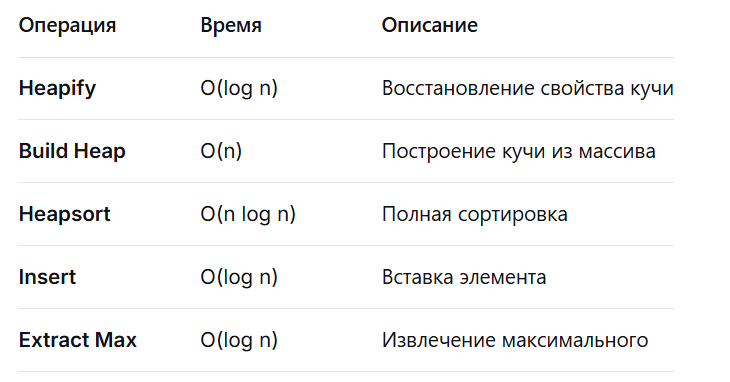